In [86]:
import numpy as np
import sklearn.datasets
from sklearn import preprocessing

import matplotlib.pyplot as plt

from src.SpectralClustering import SpectralClustering as MySpectralClustering
from src.data_generation import make_many_moons

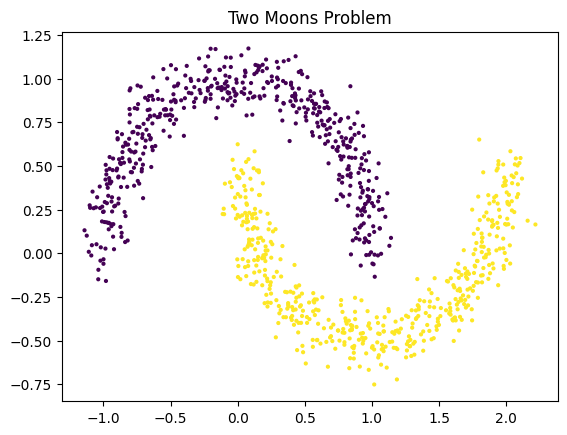

In [2]:
X, y_true = sklearn.datasets.make_moons(n_samples=1000, shuffle=False, noise=0.09, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y_true, s=4)
plt.title('Two Moons Problem')
plt.show()

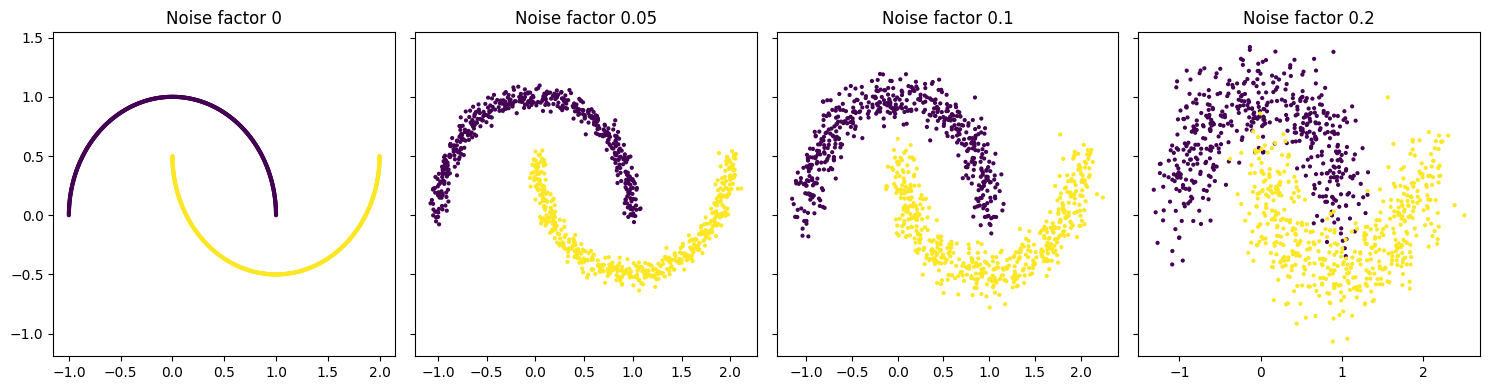

In [22]:
# different noisiness of moons
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=True)  # 1 row, 3 columns

for i, noise in enumerate([0, 0.05, 0.1, 0.2]):
    # Plot data on each subplot
    X, y_true = sklearn.datasets.make_moons(n_samples=1000, shuffle=False, noise=noise, random_state=42)
    axes[i].scatter(X[:,0], X[:,1], c=y_true, s=4)
    axes[i].set_title(f'Noise factor {noise}')

# Adjust layout and display
plt.tight_layout()
plt.show()

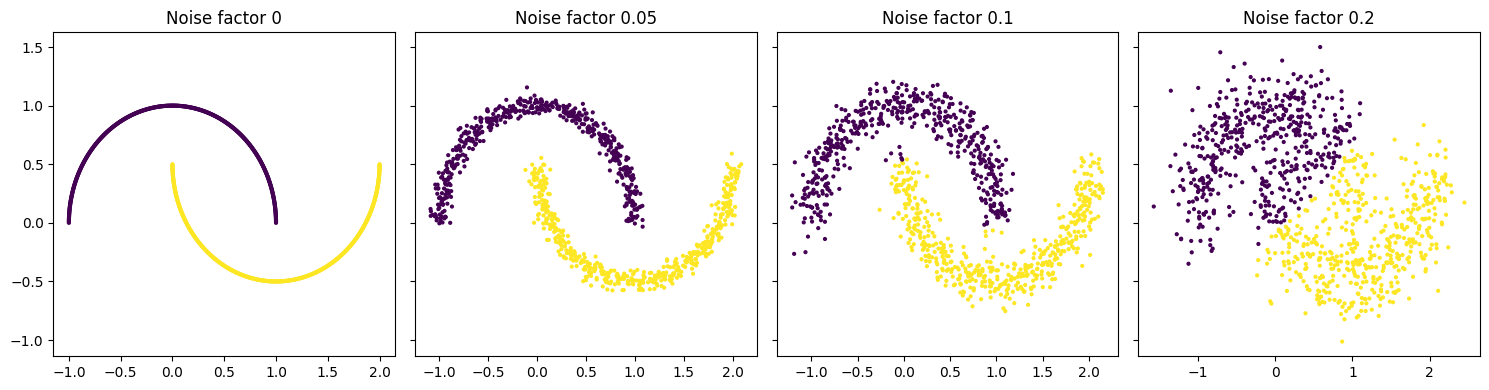

In [53]:
# default performance for different noise

fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=True)  # 1 row, 3 columns

for i, noise in enumerate([0, 0.05, 0.1, 0.2]):
    # Plot data on each subplot
    X, y_true = sklearn.datasets.make_moons(n_samples =1000, shuffle=False, noise=noise)
    y_pred = MySpectralClustering(2).fit(X)
    
    axes[i].scatter(X[:,0], X[:,1], c=y_pred, s=4)
    axes[i].set_title(f'Noise factor {noise}')

# Adjust layout and display
plt.tight_layout()
plt.show()

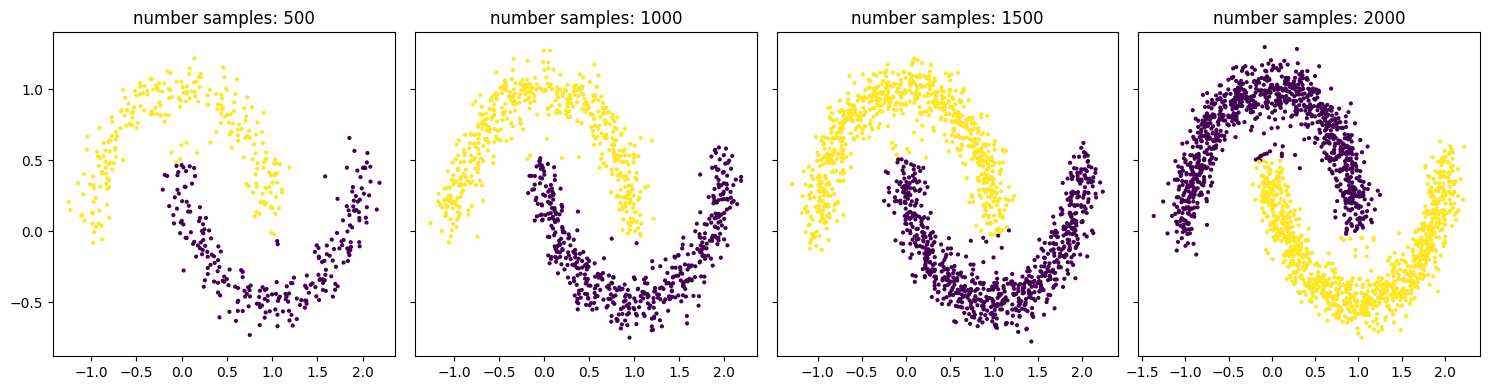

In [35]:
# default config for different sizes
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=True)  # 1 row, 3 columns

for i, size in enumerate([500, 1000, 1500, 2000]):
    # Plot data on each subplot
    X, y_true = sklearn.datasets.make_moons(n_samples =size, shuffle=False, noise=0.1)
    y_pred = MySpectralClustering(2).fit(X)
    
    axes[i].scatter(X[:,0], X[:,1], c=y_pred, s=4)
    axes[i].set_title(f'number samples: {size}')

# Adjust layout and display
plt.tight_layout()
plt.show()

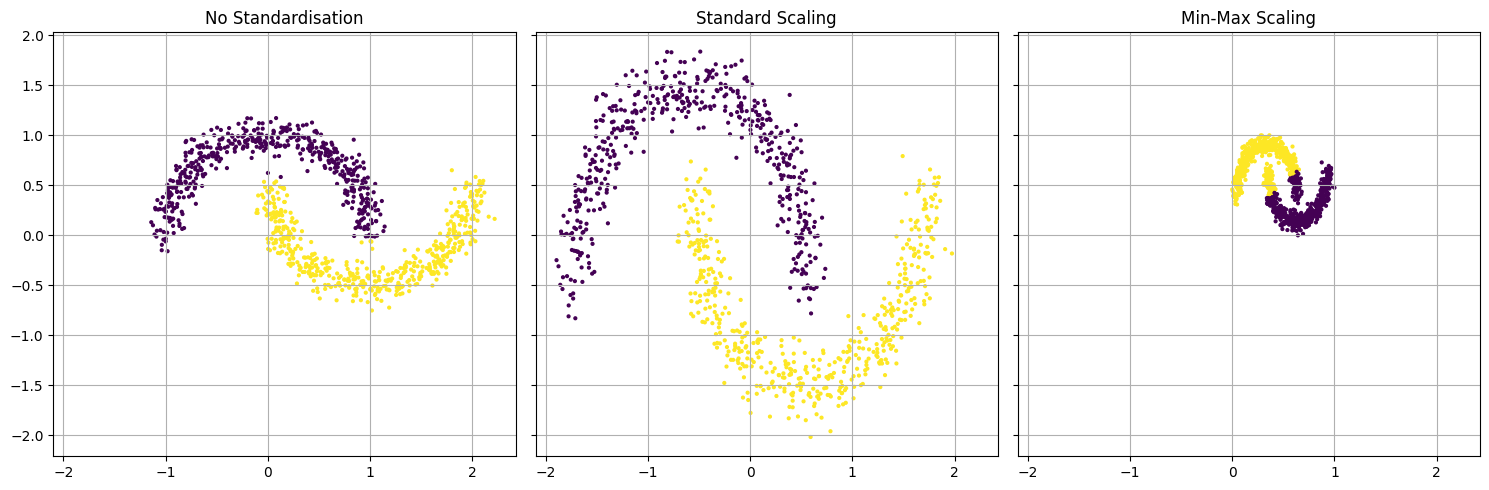

In [9]:
# Comparison of standardisation
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)  # 1 row, 3 columns
X, y_true = sklearn.datasets.make_moons(n_samples=1000, shuffle=False, noise=0.09, random_state=42)

# Plot data on each subplot
spec_model = MySpectralClustering(2, standardisation='none')
spec_model.fit(X)
y_pred = spec_model.labels_
axes[0].scatter(X[:,0], X[:,1], c=y_pred, s=4)
axes[0].set_title('No Standardisation')
axes[0].grid(True)

spec_model = MySpectralClustering(2, standardisation='standard')
spec_model.fit(X)
y_pred = spec_model.labels_
nX = preprocessing.StandardScaler().fit_transform(X)
axes[1].scatter(nX[:,0], nX[:,1], c=y_pred, s=4)
axes[1].set_title('Standard Scaling')
axes[1].grid(True)

spec_model = MySpectralClustering(2, standardisation='min-max')
spec_model.fit(X)
y_pred = spec_model.labels_
nX = preprocessing.MinMaxScaler().fit_transform(X)
axes[2].scatter(nX[:,0], nX[:,1], c=y_pred, s=4)
axes[2].set_title('Min-Max Scaling')
axes[2].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

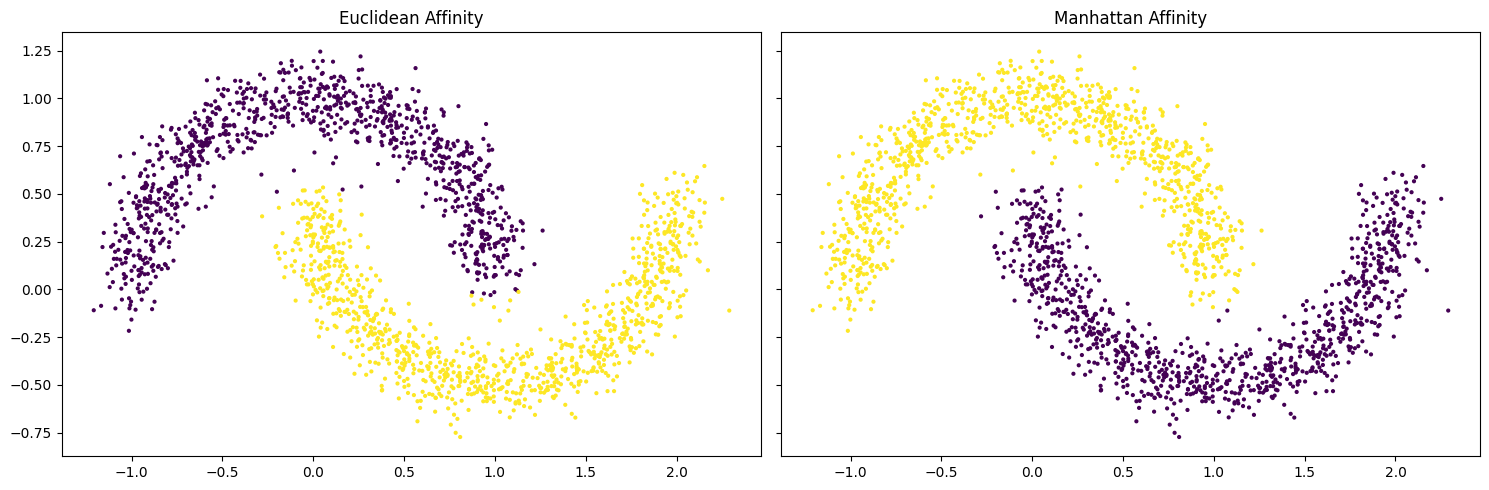

In [64]:
# Comparison of affinity
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)  # 1 row, 3 columns
X, y_true = sklearn.datasets.make_moons(n_samples=2000, shuffle=False, noise=0.1)

# Plot data on each subplot
y_pred = MySpectralClustering(2, affinity='euclidean').fit(X)
axes[0].scatter(X[:,0], X[:,1], c=y_pred, s=4)
axes[0].set_title('Euclidean Affinity')

y_pred = MySpectralClustering(2, affinity='manhattan').fit(X)
axes[1].scatter(X[:,0], X[:,1], c=y_pred, s=4)
axes[1].set_title('Manhattan Affinity')

# Adjust layout and display
plt.tight_layout()
plt.show()

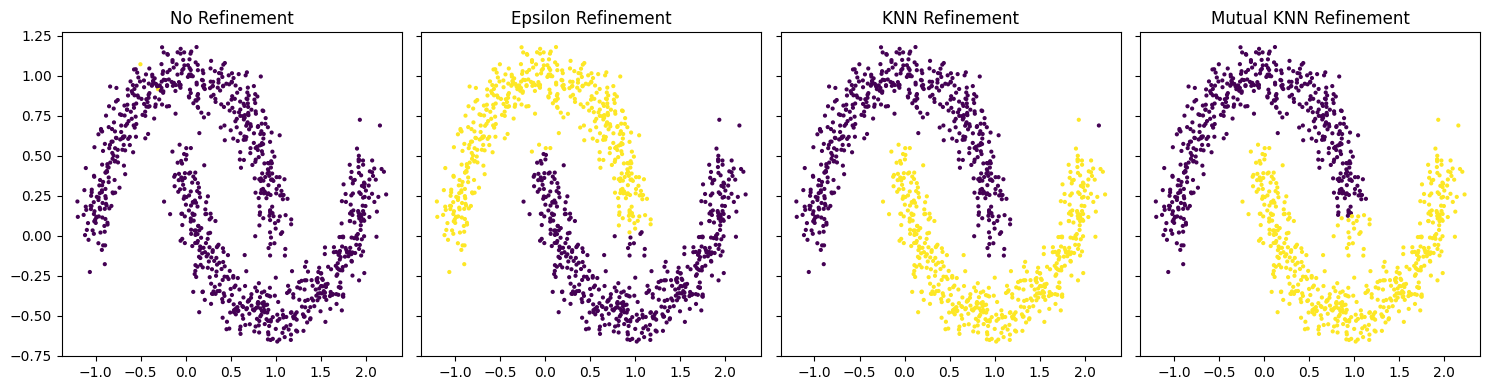

In [84]:
# Comparison of refinement
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=True, sharex=True)  # 1 row, 3 columns
X, y_true = sklearn.datasets.make_moons(n_samples=1000, shuffle=False, noise=0.1)

# Plot data on each subplot
y_pred = MySpectralClustering(2, refinement='none').fit(X)
axes[0].scatter(X[:,0], X[:,1], c=y_pred, s=4)
axes[0].set_title('No Refinement')

y_pred = MySpectralClustering(2, refinement='eps').fit(X)
nX = preprocessing.StandardScaler().fit_transform(X)
axes[1].scatter(X[:,0], X[:,1], c=y_pred, s=4)
axes[1].set_title('Epsilon Refinement')

y_pred = MySpectralClustering(2, refinement='knn').fit(X)
axes[2].scatter(X[:,0], X[:,1], c=y_pred, s=4)
axes[2].set_title('KNN Refinement')

y_pred = MySpectralClustering(2, refinement='mutual_knn').fit(X)
axes[3].scatter(X[:,0], X[:,1], c=y_pred, s=4)
axes[3].set_title('Mutual KNN Refinement')

# Adjust layout and display
plt.tight_layout()
plt.show()

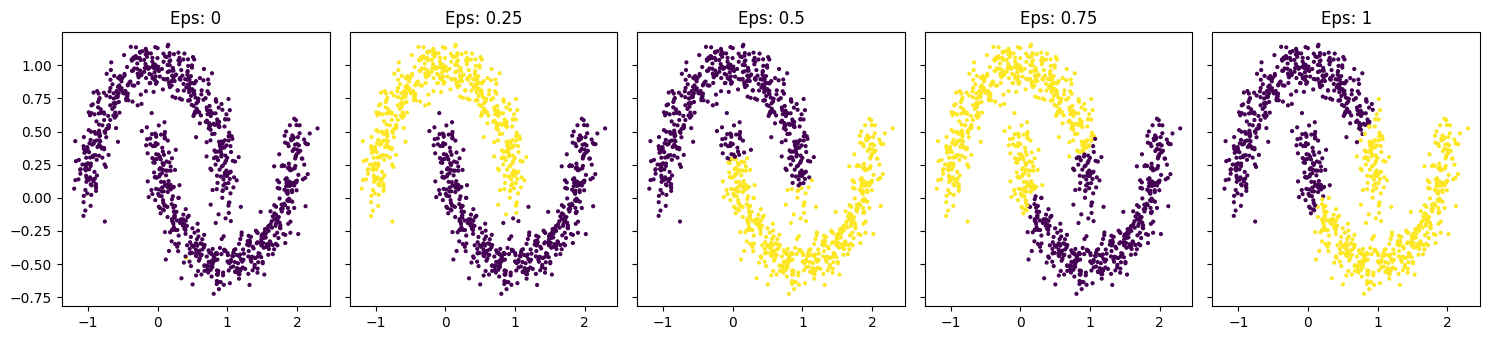

In [106]:
# effect of density - eps
REFINEMENT_EPS_TESTS = [0, 0.25, 0.5, 0.75, 1]
fig, axes = plt.subplots(1, len(REFINEMENT_EPS_TESTS), figsize=(15, 3.5), sharey=True, sharex=True)  # 1 row, 3 columns
X, y_true = sklearn.datasets.make_moons(n_samples=1000, shuffle=False, noise=0.1)


for i, eps in enumerate(REFINEMENT_EPS_TESTS):
    # Plot data on each subplot
    y_pred = MySpectralClustering(2, refinement='eps', eps = eps).fit(X)
    axes[i].scatter(X[:,0], X[:,1], c=y_pred, s=4)
    axes[i].set_title(f'Eps: {eps}')

# Adjust layout and display
plt.tight_layout()
plt.show()

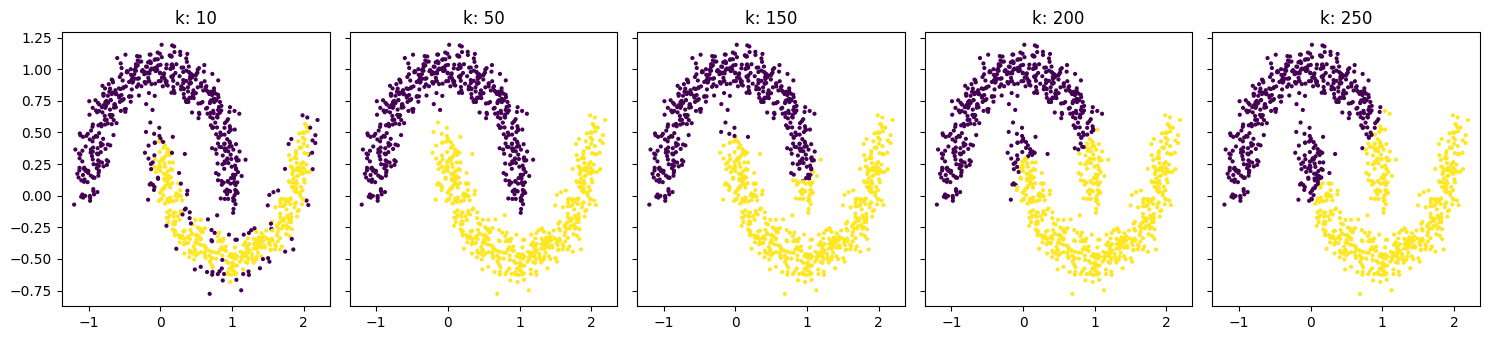

In [123]:
# effect of density - KNN
REFINEMENT_K_TESTS   = [10, 50, 150, 200, 250]
fig, axes = plt.subplots(1, len(REFINEMENT_K_TESTS), figsize=(15, 3.5), sharey=True, sharex=True)  # 1 row, 3 columns
X, y_true = sklearn.datasets.make_moons(n_samples=1000, shuffle=False, noise=0.1)

for i, k in enumerate(REFINEMENT_K_TESTS):
    # Plot data on each subplot
    y_pred = MySpectralClustering(2, refinement='knn', k = k).fit(X)
    axes[i].scatter(X[:,0], X[:,1], c=y_pred, s=4)
    axes[i].set_title(f'k: {k}')

# Adjust layout and display
plt.tight_layout()
plt.show()

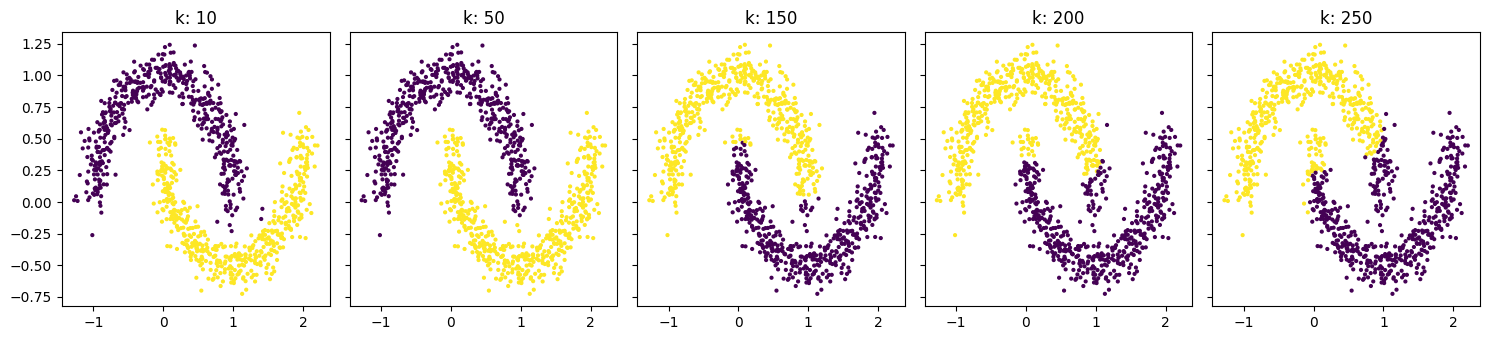

In [118]:
# effect of density - KNN
REFINEMENT_K_TESTS   = [10, 50, 150, 200, 250]
fig, axes = plt.subplots(1, len(REFINEMENT_K_TESTS), figsize=(15, 3.5), sharey=True, sharex=True)  # 1 row, 3 columns
X, y_true = sklearn.datasets.make_moons(n_samples=1000, shuffle=False, noise=0.1)

for i, k in enumerate(REFINEMENT_K_TESTS):
    # Plot data on each subplot
    y_pred = MySpectralClustering(2, refinement='mutual_knn', k = k).fit(X)
    axes[i].scatter(X[:,0], X[:,1], c=y_pred, s=4)
    axes[i].set_title(f'k: {k}')

# Adjust layout and display
plt.tight_layout()
plt.show()